In [ ]:
!pip install pyreadr  

     |████████████████████████████████| 361 kB 5.1 MB/s 


In [ ]:
import pyreadr 
result = pyreadr.read_r('acc_walking_IU.rda')
# done! let's see what we got
print(result.keys()) # let's check what objects we got
acc_walking_IU = result["acc_walking_IU"]
acc_walking_IU  

odict_keys(['acc_walking_IU'])


,subj_id,loc_id,time_s,x,y,z
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160
...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

In [ ]:
acc_walking_IU = acc_walking_IU.dropna()
import numpy as np
acc_walking_IU['magnitude'] = np.sqrt(acc_walking_IU['x']**2+acc_walking_IU['y']**2+acc_walking_IU['z']**2)

In [ ]:
['id86237981', 'id4ea159a8', 'id3e3e50c7', 'idf1ce9a0f',
       'idecc9265e', 'id650857ca', 'ida61e8ddf', 'idc91a49d0',
       'id9603e9c3', 'id00b70b13', 'idb221f542', 'id82b9735c',
       'id1f372081', 'id7c20ee7a', 'idbae5a811', 'id5993bf4a',
       'id1165e00c', 'id079c763c', 'id8e66893c', 'idf540d82b',
       'idd80ac2b4', 'id34e056c8', 'idfc5f05e4', 'idf5e3678b',
       'id37a54bbf', 'idabd0c53c', 'idc735fc09', 'id687ab496',
       'id1c7e64ad', 'id5308a7d6', 'id8af5374b', 'idff99de96']

['id86237981',
 'id4ea159a8',
 'id3e3e50c7',
 'idf1ce9a0f',
 'idecc9265e',
 'id650857ca',
 'ida61e8ddf',
 'idc91a49d0',
 'id9603e9c3',
 'id00b70b13',
 'idb221f542',
 'id82b9735c',
 'id1f372081',
 'id7c20ee7a',
 'idbae5a811',
 'id5993bf4a',
 'id1165e00c',
 'id079c763c',
 'id8e66893c',
 'idf540d82b',
 'idd80ac2b4',
 'id34e056c8',
 'idfc5f05e4',
 'idf5e3678b',
 'id37a54bbf',
 'idabd0c53c',
 'idc735fc09',
 'id687ab496',
 'id1c7e64ad',
 'id5308a7d6',
 'id8af5374b',
 'idff99de96']

In [ ]:
# dfMerged =[]
# for k in acc_walking_IU.subj_id.unique():
#   data_1 = acc_walking_IU[(acc_walking_IU['subj_id'] == k) ] 
#   x = data_1['magnitude'].values
#   peaks2, _ = find_peaks(x, prominence=0.5) 
#   initial = np.zeros(shape = len(x))
#   start = peaks2[0]
#   for index,each in enumerate(peaks2):
#       if(index %2 != 0):
#         initial[start:each] = 1
#       start = each
#   data_1["label"] = initial
#   dfMerged.append(data_1) 

In [ ]:

data_1 = acc_walking_IU[(acc_walking_IU['subj_id'] == 'id86237981') ]
data_lw = data_1[(data_1['loc_id'] == 'left_wrist') ]
x = data_lw['magnitude'].values
peaks2, _ = find_peaks(x, prominence=0.5) 
initial = np.zeros(shape = len(x))
start = peaks2[0]
for index,each in enumerate(peaks2):
    if(index %2 != 0):
      initial[start:each] = 1
    start = each
data_lw["label"] = initial 

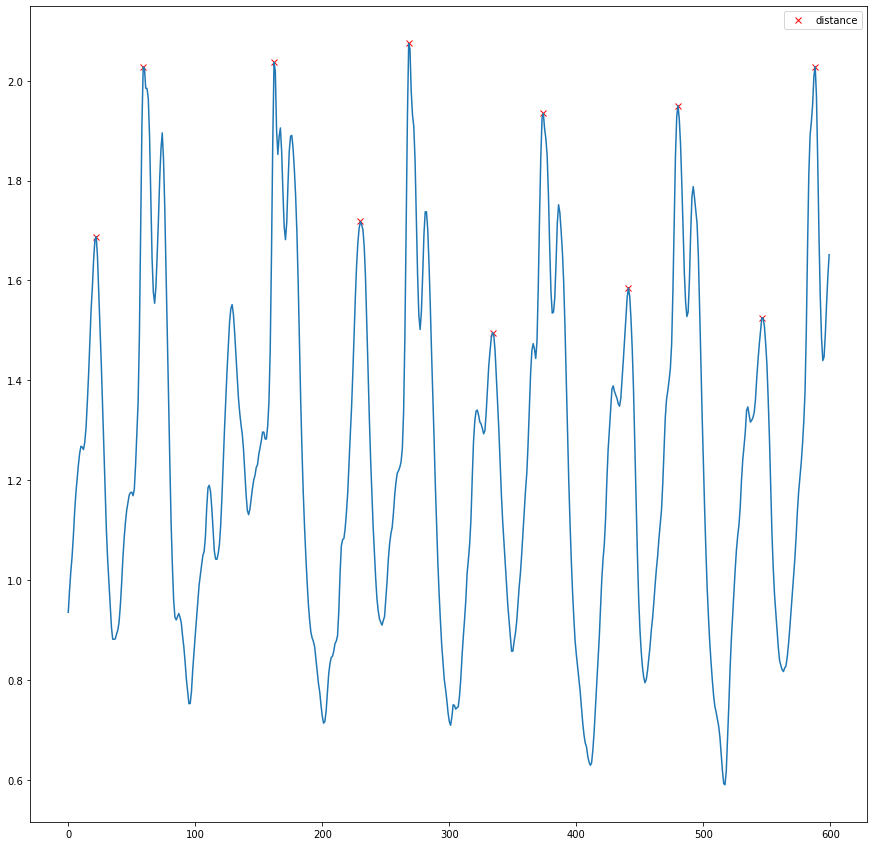

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

plt.figure(figsize=(15,15))

x = data_lw['magnitude'][400:1000].values
peaks2, _ = find_peaks(x, prominence=0.5)      # BEST!

plt.plot(peaks2, x[peaks2], "xr"); plt.plot(x); plt.legend(['distance'])
plt.show()

In [ ]:
data_lw['subj_id'] = data_lw['subj_id'].astype('category')
data_lw['subj_id'] = data_lw['subj_id'].cat.codes

data_lw['label'] = data_lw['label'].astype('category')
data_lw['label'] = data_lw['label'].cat.codes

data_lw['loc_id'] = data_lw['loc_id'].astype('category')
data_lw['loc_id'] = data_lw['loc_id'].cat.codes

In [ ]:
# data_1.head(50)
data_lw.shape

(20653, 8)

In [ ]:
train = data_lw.loc[:15000]
df_test = data_lw.loc[15000:]

In [ ]:
df_test.shape

(5653, 8)

In [ ]:
import numpy as np
from scipy import stats
from scipy.signal import find_peaks
# df_train = data_1[data_1.subj_id.isin( data_1.subj_id.unique()[:25] ) ] 
df_train = train
# creating windows 
#find the peaks
x = df_train['magnitude'].values
peaks, _ = find_peaks(x, prominence=0.5)
peaks = np.insert(peaks, 0, 0, axis=0)

#Removing and saving the list of dataframes for each stride.
list_of_df = []
windowsRemoved = []
for each in range(0, (len(peaks) - 1), 1  ):
  # if 54 <= abs(peaks[each + 1]- peaks[each]) <= 106:
    list_of_df.append( df_train.loc[ peaks[each]:(peaks[each  + 1] - 1 ) ] )           
  # else: 
  #   windowsRemoved.append((peaks[each + 1]- peaks[each]))


#zero imputing for each stride.
list_of_Zerodf = []
for each in range(0, len(list_of_df) ,1 ):
  # if list_of_df[each].shape[0] < 100 :
  i = np.arange(start= list_of_df[each].shape[0] + 1 , stop=111 )
  df_zero = pd.DataFrame(0, index=i, columns=list_of_df[each].columns)
  w1 = pd.concat([list_of_df[each],df_zero])  
  list_of_Zerodf.append(w1) 


# print("Testing left stride : ",list_of_Zerodf[0])
# print("Testing right stride : ",list_of_Zerodf[2])

#dataset after combining zero imputed df's.
FinalDataFrame = pd.concat(list_of_Zerodf)


# WINDOWING WITH NON OVERLAPPING WINDOWS with size 110
xs = []
ys = []
zs = []
train_labels = []
new_list = []
window_size = 110
step_size = 110

for i in range(0, FinalDataFrame.shape[0] - window_size, step_size):
  xs = FinalDataFrame['x'].values[i: i + 110]
  ys = FinalDataFrame['y'].values[i: i + 110]
  zs = FinalDataFrame['z'].values[i: i + 110]

  label = FinalDataFrame['label'].values[i: i + 110][0] 
  a = np.c_[ xs,ys,zs ]
  new_list.append(a)
  train_labels.append(label)

train_x = np.asarray(new_list)
train_y = np.asarray(train_labels)

In [ ]:
list_of_Zerodf[9]

,subj_id,loc_id,time_s,x,y,z,magnitude,label
459,0,2,4.59,-0.688,-1.871,-0.371,2.027714,1
460,0,2,4.60,-0.695,-1.867,-0.363,2.024965,1
461,0,2,4.61,-0.648,-1.848,-0.324,1.984939,1
462,0,2,4.62,-0.566,-1.883,-0.270,1.984678,1
463,0,2,4.63,-0.465,-1.898,-0.203,1.964647,1
...,...,...,...,...,...,...,...,...
106,0,0,0.00,0.000,0.000,0.000,0.000000,0
107,0,0,0.00,0.000,0.000,0.000,0.000000,0
108,0,0,0.00,0.000,0.000,0.000,0.000000,0
109,0,0,0.00,0.000,0.000,0.000,0.000000,0


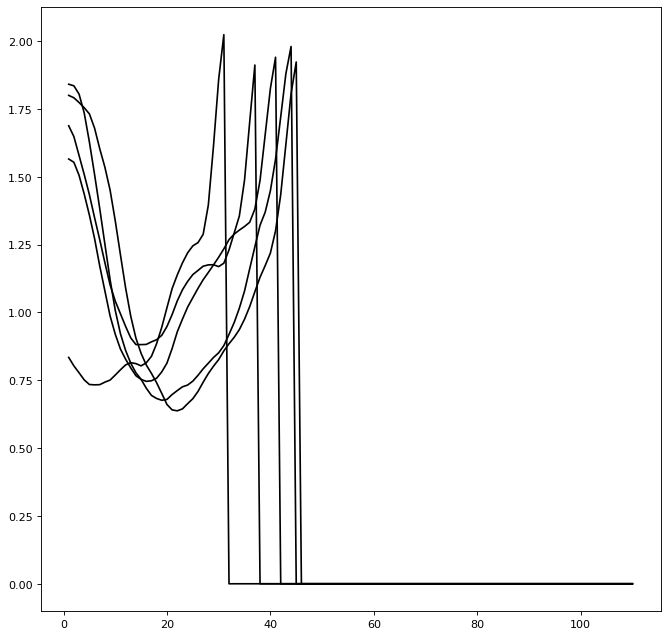

In [ ]:
import matplotlib.pyplot  as plt
plt.figure(figsize=(10, 10), dpi=80)
for each in range(0,10,2):
  plt.plot( np.arange(1,111)   , list(list_of_Zerodf[each]['magnitude']), color = "black" )
plt.show()

1
3
5
7
9


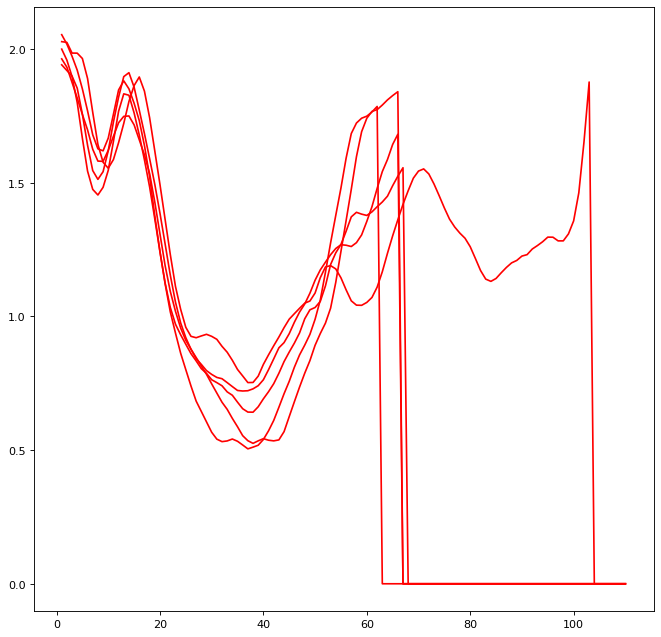

In [ ]:
import matplotlib.pyplot  as plt
plt.figure(figsize=(10, 10), dpi=80)
for each in range(1,10,2):
  print(each)
  plt.plot( np.arange(1,111)   , list(list_of_Zerodf[each]['magnitude']), color = "red" )
plt.show()

In [ ]:

# df_test = df[df.subj_id.isin( df.subj_id.unique()[25:] )]

#find the peaks
x = df_test['magnitude'].values
peaks, _ = find_peaks(x, prominence=0.5)
peaks = np.insert(peaks, 0, 0, axis=0)
list_of_df = []
#list of dataframes for each stride.
for each in range(0, (len(peaks) - 1),1  ):
  list_of_df.append( df_test.loc[ peaks[each]:(peaks[each + 1] - 1 )]) 
#zero imputing for each stride.
list_of_Zerodf = []
for each in range(0, len(list_of_df) ,1 ):
  i = np.arange(start= list_of_df[each].shape[0] + 1 , stop=151 )
  df_zero = pd.DataFrame(0, index=i, columns=list_of_df[each].columns)
  w1 = pd.concat([list_of_df[each],df_zero])  
  list_of_Zerodf.append(w1) 

print(list_of_Zerodf[3])

#dataset after combining zero imputed df's.
FinalDataFrame = pd.concat(list_of_Zerodf)

xs = []
ys = []
zs = []
train_labels = []
new_list = []
window_size = 110
step_size = 110

for i in range(0, FinalDataFrame.shape[0] - window_size, step_size):
  xs = FinalDataFrame['x'].values[i: i + 110]
  ys = FinalDataFrame['y'].values[i: i + 110]
  zs = FinalDataFrame['z'].values[i: i + 110]

  label = FinalDataFrame['label'].values[i: i + 110][0] 
  a = np.c_[ xs,ys,zs ]
  new_list.append(a)
  train_labels.append(label)

test_x = np.asarray(new_list)
test_y = np.asarray(train_labels)

     subj_id  loc_id  time_s    x    y    z  magnitude  label
1          0       0     0.0  0.0  0.0  0.0        0.0      0
2          0       0     0.0  0.0  0.0  0.0        0.0      0
3          0       0     0.0  0.0  0.0  0.0        0.0      0
4          0       0     0.0  0.0  0.0  0.0        0.0      0
5          0       0     0.0  0.0  0.0  0.0        0.0      0
..       ...     ...     ...  ...  ...  ...        ...    ...
146        0       0     0.0  0.0  0.0  0.0        0.0      0
147        0       0     0.0  0.0  0.0  0.0        0.0      0
148        0       0     0.0  0.0  0.0  0.0        0.0      0
149        0       0     0.0  0.0  0.0  0.0        0.0      0
150        0       0     0.0  0.0  0.0  0.0        0.0      0

[150 rows x 8 columns]


In [ ]:
test_y.shape

(144,)

In [ ]:
import pandas as pd
import keras
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
model_cnn = Sequential() 

model_cnn.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(110,3)))

model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Conv1D(filters=96, kernel_size=2, activation='relu'))
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Flatten())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(64, activation='sigmoid'))
model_cnn.add(Dense(1,activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 109, 160)          1120      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 109, 160)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 108, 128)          41088     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 108, 128)         0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 107, 96)           24672     
                                                                 
 conv1d_3 (Conv1D)           (None, 106, 64)           1

In [ ]:
model_cnn.fit(train_x, train_y, epochs=100, batch_size=100, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 165ms/step - loss: 0.0176 - accuracy: 0.9928 - recall: 1.0000 - precision: 0.9810
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0158 - accuracy: 0.9928 - recall: 1.0000 - precision: 0.9810
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0183 - accuracy: 0.9892 - recall: 0.9903 - precision: 0.9808
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0148 - accuracy: 0.9928 - recall: 1.0000 - precision: 0.9810
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0183 - accuracy: 0.9928 - recall: 1.0000 - precision: 0.9810
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0168 - accuracy: 0.9928 - recall: 1.0000 - precision: 0.9810
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0149 - accuracy: 0.9928 - recall: 1.0000 - precision: 0.9810
Epoch 8/100
3/3 [==============================] - 0s 1

In [ ]:
scores = model_cnn.evaluate(test_x,test_y, verbose=1)

5/5 [==============================] - 0s 5ms/step - loss: 0.4571 - accuracy: 1.0000 - recall: 0.0000e+00 - precision: 0.0000e+00
